In [2]:
import glob
import sys
import os
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
from functools import partial
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def data_load(path):
    files = glob.glob(path)
    if not files:
        print("Chck Phath")
        sys.exit()
    else:
        files.remove(r'../data\raw_data')

    _feature=[]
    label=[]
    for address in tqdm.tqdm(files):
        label_ = os.path.basename(address)
        for num in glob.glob(address+'/*'):
            _feature.append(np.load(num))
            label.append([label_])
        print(label_)
    target = np.array(label).flatten()
    return _feature, target.reshape((-1,))

features, label = data_load('../data/*')
encoder = LabelEncoder()
target = encoder.fit_transform(label)


X_train,  X_valid, y_train, y_valid = train_test_split(np.array(features), target, test_size=0.1, random_state=0)
X_train = X_train / 255.0
X_valid = X_valid / 255.0


y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
number_of_classes = y_valid.shape[1]


 10%|█         | 1/10 [00:00<00:06,  1.32it/s]

around


 20%|██        | 2/10 [00:01<00:06,  1.25it/s]

b


 30%|███       | 3/10 [00:02<00:05,  1.30it/s]

fracture


 40%|████      | 4/10 [00:03<00:05,  1.20it/s]

ground


 50%|█████     | 5/10 [00:03<00:03,  1.25it/s]

mechanics


 60%|██████    | 6/10 [00:04<00:03,  1.27it/s]

science


 70%|███████   | 7/10 [00:05<00:02,  1.27it/s]

smile


 80%|████████  | 8/10 [00:06<00:01,  1.29it/s]

strain


 90%|█████████ | 9/10 [00:07<00:00,  1.29it/s]

stress


100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

t


In [52]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3,padding="SAME",activation='relu')

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=3, input_shape=[210, 210, 10]),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),

    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),


    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=number_of_classes, activation="softmax"),
])

layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d_72',
 'conv2d_73',
 'max_pooling2d_27',
 'conv2d_74',
 'conv2d_75',
 'max_pooling2d_28',
 'flatten_12',
 'dense_36',
 'dropout_24',
 'dense_37',
 'dropout_25',
 'dense_38']

In [53]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d_72/Identity:0' shape=(None, 210, 210, 64) dtype=float32>,
 <tf.Tensor 'conv2d_73/Identity:0' shape=(None, 210, 210, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_27/Identity:0' shape=(None, 105, 105, 64) dtype=float32>,
 <tf.Tensor 'conv2d_74/Identity:0' shape=(None, 105, 105, 128) dtype=float32>,
 <tf.Tensor 'conv2d_75/Identity:0' shape=(None, 105, 105, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_28/Identity:0' shape=(None, 52, 52, 128) dtype=float32>,
 <tf.Tensor 'flatten_12/Identity:0' shape=(None, 346112) dtype=float32>,
 <tf.Tensor 'dense_36/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dropout_24/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_37/Identity:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dropout_25/Identity:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dense_38/Identity:0' shape=(None, 10) dtype=float32>]

In [56]:
feature_map_model = keras.models.Model(model.input, layer_outputs)
feature_maps = feature_map_model.predict(np.expand_dims(X_train[0],axis=0))
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the conv2d_72 is =======>> (1, 210, 210, 64)
The shape of the conv2d_73 is =======>> (1, 210, 210, 64)
The shape of the max_pooling2d_27 is =======>> (1, 105, 105, 64)
The shape of the conv2d_74 is =======>> (1, 105, 105, 128)
The shape of the conv2d_75 is =======>> (1, 105, 105, 128)
The shape of the max_pooling2d_28 is =======>> (1, 52, 52, 128)
The shape of the flatten_12 is =======>> (1, 346112)
The shape of the dense_36 is =======>> (1, 128)
The shape of the dropout_24 is =======>> (1, 128)
The shape of the dense_37 is =======>> (1, 64)
The shape of the dropout_25 is =======>> (1, 64)
The shape of the dense_38 is =======>> (1, 10)


In [101]:
np.shape(np.squeeze(feature_maps[0],axis=0))

['conv2d_72',
 'conv2d_73',
 'max_pooling2d_27',
 'conv2d_74',
 'conv2d_75',
 'max_pooling2d_28',
 'flatten_12',
 'dense_36',
 'dropout_24',
 'dense_37',
 'dropout_25',
 'dense_38']

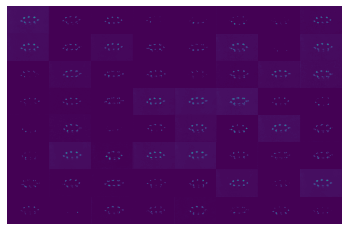

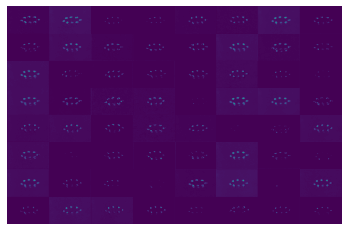

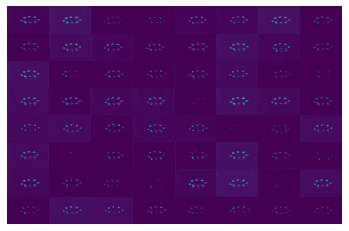

In [115]:
for num in range(0,3):
    fig, ax = plt.subplots(8,8)

    for i in range(8):
        for j in range(8):
            ax[i][j].imshow(np.squeeze(feature_maps[num],axis=0)[:,:,i*8+j],aspect = "auto")
            ax[i][j].axis('off')

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.savefig('./figure/{}'.format(layer_names[num]),dpi= 500)
    plt.show()
    plt.close()

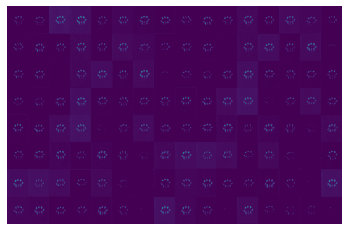

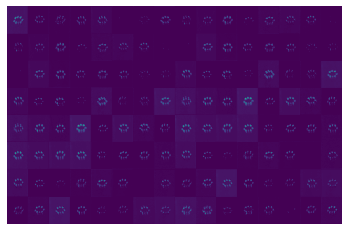

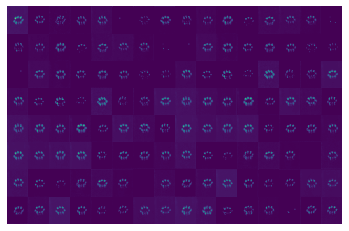

In [117]:
for num in range(3,6):
    fig, ax = plt.subplots(8,16)

    for i in range(8):
        for j in range(16):
            ax[i][j].imshow(np.squeeze(feature_maps[num],axis=0)[:,:,i*8+j],aspect = "auto")
            ax[i][j].axis('off')

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.savefig('./figure/{}'.format(layer_names[num]),dpi= 500)
    plt.show()